# Understanding Distributions Through Sampling

Optional Task under "Applied Plotting, Charting & Data Representation in Python" (Coursera - University of Michigan)

<IPython.core.display.Javascript object>


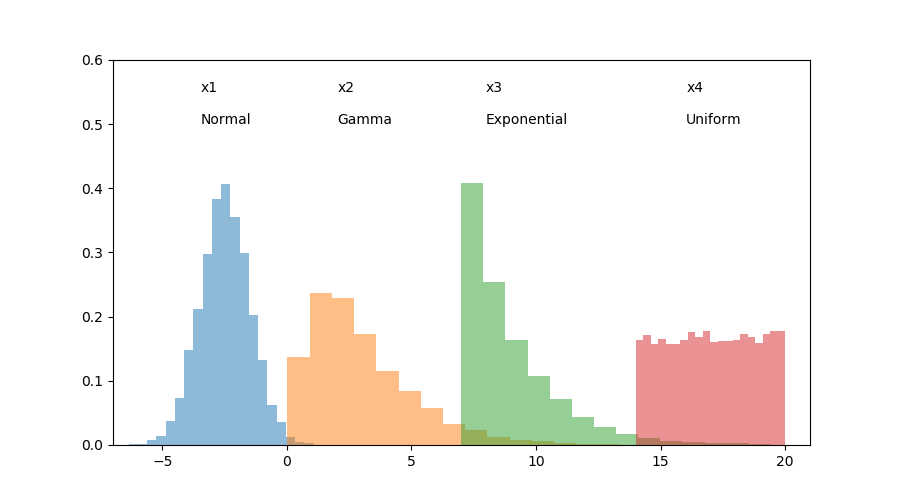

In [9]:
import matplotlib.pyplot as plt
import numpy as np


# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms

plt.figure(figsize=(9,5))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1, 0.5, 'x1\n\nNormal')
plt.text(x2.mean()-1, 0.5, 'x2\n\nGamma')
plt.text(x3.mean()-1, 0.5, 'x3\n\nExponential')
plt.text(x4.mean()-1, 0.5, 'x4\n\nUniform')

plt.show()

<IPython.core.display.Javascript object>


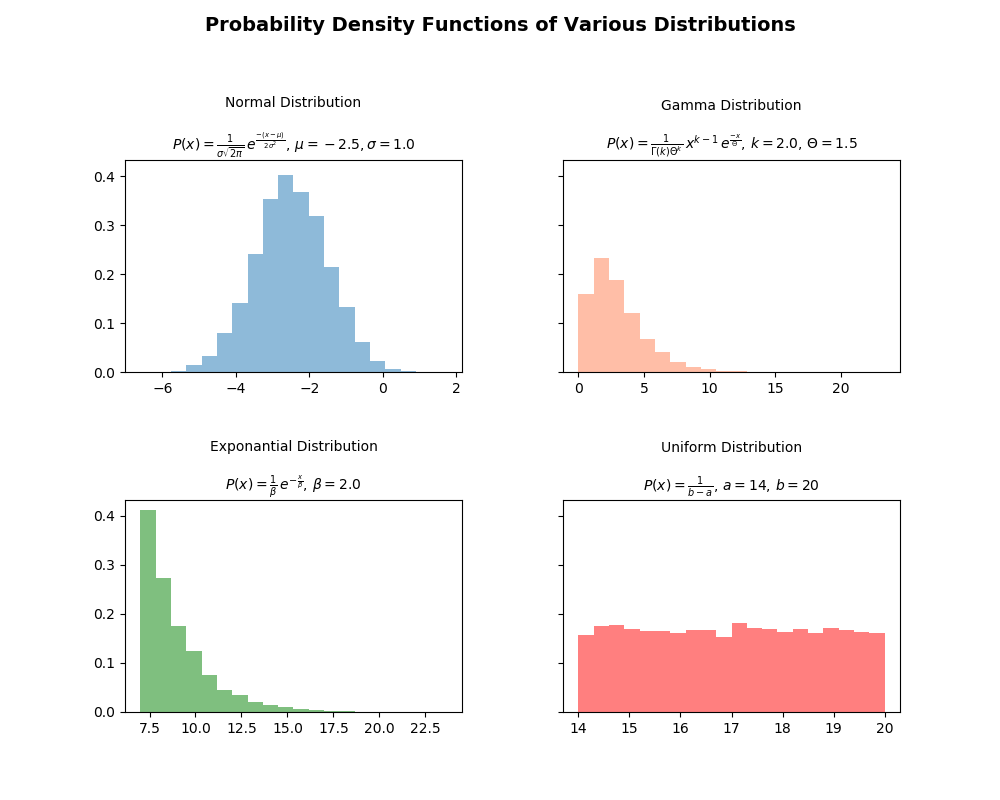

In [6]:
# Use subplots for histograms

%matplotlib notebook

fig, axs = plt.subplots(2, 2, sharey='all', figsize=(10,8))
fig.suptitle('Probability Density Functions of Various Distributions', fontsize=14, fontweight='bold')

_1 = axs[0, 0].hist(x1, density=True, bins=20, alpha=0.5)
axs[0, 0].set_title('Normal Distribution\n\n' + r'$P(x) = \frac{1}{\sigma\sqrt{2\pi}}\/e^{\frac{-(x-\mu)}{2\sigma^2}},\/{\mu = -2.5}, {\sigma=1.0}$', fontsize='medium')
_2 = axs[0, 1].hist(x2, density=True, bins=20, color= 'coral', alpha=0.5)
axs[0, 1].set_title('Gamma Distribution\n\n' + r'$P(x) = \frac{1}{\Gamma(k)\Theta^k}\/x^{k-1}\/e^\frac{-x}{\Theta},\/k=2.0,\/{\Theta=1.5}$',fontsize='medium')
_3 = axs[1, 0].hist(x3, density=True, bins=20, color= 'green', alpha=0.5)
axs[1, 0].set_title('Exponantial Distribution\n\n' + r'$P(x)= \frac{1}{\beta}\/e^{-\frac{x}{\beta}},\/{\beta=2.0}$', fontsize='medium')
_4 = axs[1, 1].hist(x4, density=True, bins=20, color= 'red', alpha=0.5)
axs[1, 1].set_title('Uniform Distribution\n\n' + r'$P(x) = \frac{1}{b-a}, \/a=14, \/b=20$', fontsize='medium')

plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.3, hspace=0.6)


In [10]:
# Create an animation, pulling between 100 and 1000 samples from each of the random variables (x1, x2, x3, x4) for each plot.

import matplotlib.animation as animation

n = 1000
# samples from each of the random variables
x1_samp = np.random.choice(x1, n)
x2_samp = np.random.choice(x2, n)
x3_samp = np.random.choice(x3, n)
x4_samp = np.random.choice(x4, n)

<IPython.core.display.Javascript object>


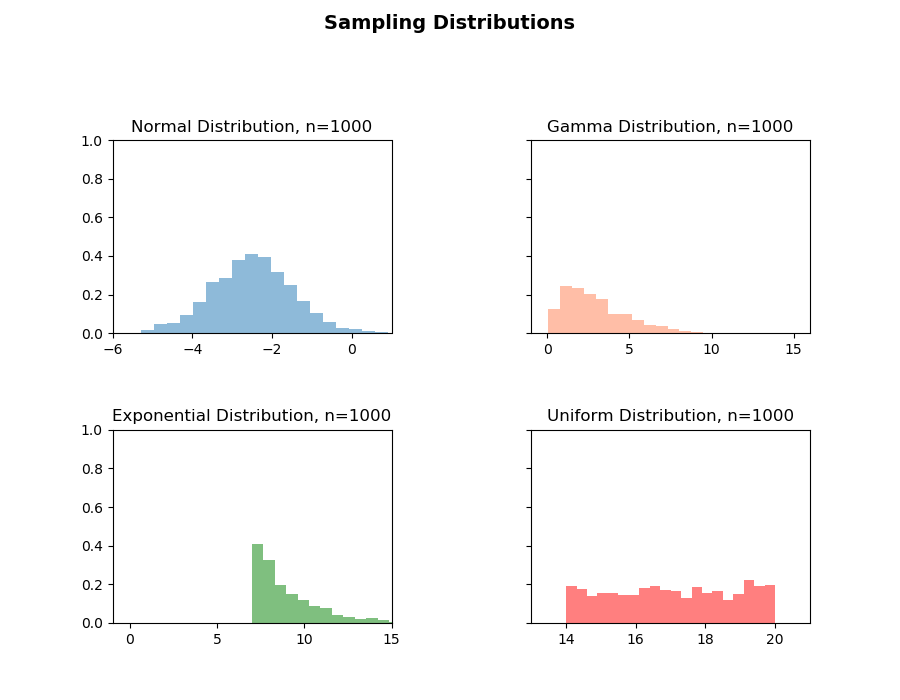

In [18]:
# create the function that will do the plotting, where curr is the current frame
def update(curr, max_steps=1000):
    # check if animation is at the last frame, and if so, stop the animation 'a'
    if curr == max_steps:
        a.event_source.stop()
        # axs = fig.axes

    axs[0, 0].cla()
    axs[0, 1].cla()
    axs[1, 0].cla()
    axs[1, 1].cla()
    
    axs[0, 0].hist(x1_samp[:curr], density=True, bins=20, alpha=0.5)
    axs[0, 0].set_title('Normal Distribution, n={}'.format(curr))
    axs[0, 0].axis([-6, 1, 0, 1])
    
    axs[0, 1].hist(x2_samp[:curr], density=True, bins=20, color='coral', alpha=0.5)
    axs[0, 1].set_title('Gamma Distribution, n={}'.format(curr))
    axs[0, 1].axis([-1, 16, 0, 1])
    
    axs[1, 0].hist(x3_samp[:curr], density=True, bins=20, color='green', alpha=0.5)
    axs[1, 0].set_title('Exponential Distribution, n={}'.format(curr))
    axs[1, 0].axis([-1, 15, 0, 1])
    
    axs[1, 1].hist(x4_samp[:curr], density=True, bins=20, color='red', alpha=0.5)
    axs[1, 1].set_title('Uniform Distribution, n={}'.format(curr))
    axs[1, 1].axis([13, 21, 0, 1])

fig, axs = plt.subplots(2, 2, sharey='all', figsize=(9,7))
fig.suptitle('Sampling Distributions', fontsize=14, fontweight='bold')
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.8, wspace=0.5, hspace=0.5)

a = animation.FuncAnimation(fig, update, interval=100, frames=range(100,1100,100), blit=True)